# Titanic project

The problem is to predict whether a passenger survived the Titanic disaster based on their age, sex, class, and other variables.



# Import liabrary

In [72]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Here we have 891 rows and 12 columns

In [3]:
print("number of Rows and columns:", df.shape)
print("name of columns:", df.columns)

number of Rows and columns: (891, 12)
name of columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


- Survived: 0 = No, 1 = Yes

- pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd

- sibsp: # of siblings / spouses aboard the Titanic

- parch: # of parents / children aboard the Titanic

- ticket: Ticket number

- cabin: Cabin number

- embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

# Exploratory Data Analysis

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

 we have string, object and float data type in our datasets

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

missing value is presented in the column Age,Cabin,Embarked in the dataset. so better understanding, lets check heatmap

<AxesSubplot:>

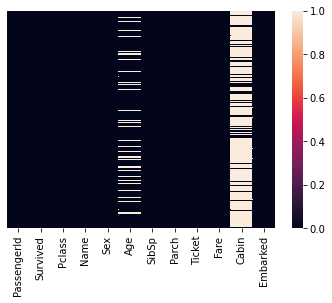

In [6]:
sns.heatmap(df.isnull(),yticklabels=False)

Most of the nan value shown in the Age and Cabin columns.Looking at the cabin column ,compare to the size of the data we are just missing too much of the data to do somthing useful with at abasic level.

In [7]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
df.groupby("Survived").mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


1. On average, the "Survived" group (with a value of 1) has a lower average "PassengerId" (444.37) compared to the "Not Survived" group (447.02). However, this difference may not have any significant meaning as "PassengerId" is an arbitrary identifier.

2. The average "Pclass" (passenger class) of the "Survived" group (1.95) is lower than that of the "Not Survived" group (2.53). This suggests that passengers with lower class numbers (higher socio-economic status) had a higher chance of survival.

3. The average "Age" of the "Survived" group (28.34) is slightly lower than that of the "Not Survived" group (30.63). However, the difference may not be substantial and would require further analysis to determine its significance.

4. The average number of "SibSp" (number of siblings/spouses aboard) and "Parch" (number of parents/children aboard) is slightly lower for the "Survived" group compared to the "Not Survived" group. This suggests that passengers traveling with fewer family members had a slightly higher chance of survival.

5. The average "Fare" (ticket fare) of the "Survived" group (48.40) is higher than that of the "Not Survived" group (22.12). This indicates that passengers who paid higher fares had a higher likelihood of survival, possibly reflecting their higher class status or preferred cabin location.

In [9]:
# lets check the value count of each column

for i in df.columns:
    print(df[i].value_counts())
    print('\n')

891    1
293    1
304    1
303    1
302    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64


0    549
1    342
Name: Survived, dtype: int64


3    491
1    216
2    184
Name: Pclass, dtype: int64


Collander, Mr. Erik Gustaf             1
Skoog, Mr. Wilhelm                     1
Morrow, Mr. Thomas Rowan               1
Skoog, Master. Karl Thorsten           1
Thorneycroft, Mr. Percival             1
                                      ..
Lefebre, Miss. Ida                     1
Troutt, Miss. Edwina Celia "Winnie"    1
Knight, Mr. Robert J                   1
Betros, Mr. Tannous                    1
Becker, Master. Richard F              1
Name: Name, Length: 891, dtype: int64


male      577
female    314
Name: Sex, dtype: int64


24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64


0    608
1    209
2     28
4     1

Here we can see that higher classes tend to be older. outlier also can see in the 2nd and 3rd class. We will use these average age values to impute based on Pclass for age

In [10]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if not pd.isnull(Age):
        return Age
    if Pclass == 1:
        return 37  # Replacing with 37 because the average value of the first class is around 37
    elif Pclass == 2:
        return 29  # Average value of the second class is near 29
    else:
        return 24  # Average value of the third class

In [11]:
df["Age"] = df[["Age","Pclass"]].apply(impute_age,axis=1)

<AxesSubplot:>

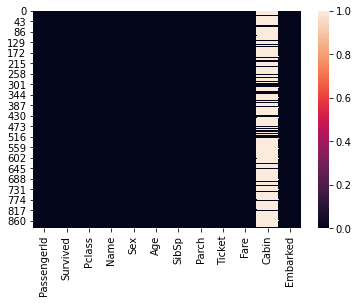

In [12]:
sns.heatmap(df.isnull())

my Age column is replace with Pclass value.there are no nan value in the age column. In cabin columns there are lots of nan value so it is better to drop the column

In [13]:
# droping Cabin coloumn
df.drop("Cabin",axis=1,inplace=True)

In [14]:
# checking the unique value of each column and list it in a new frame
df.nunique().to_frame("No. of unique value")

,No. of unique value
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


In [15]:
cat_col = df[["Survived","Pclass","Sex","SibSp","Parch","Embarked"]]

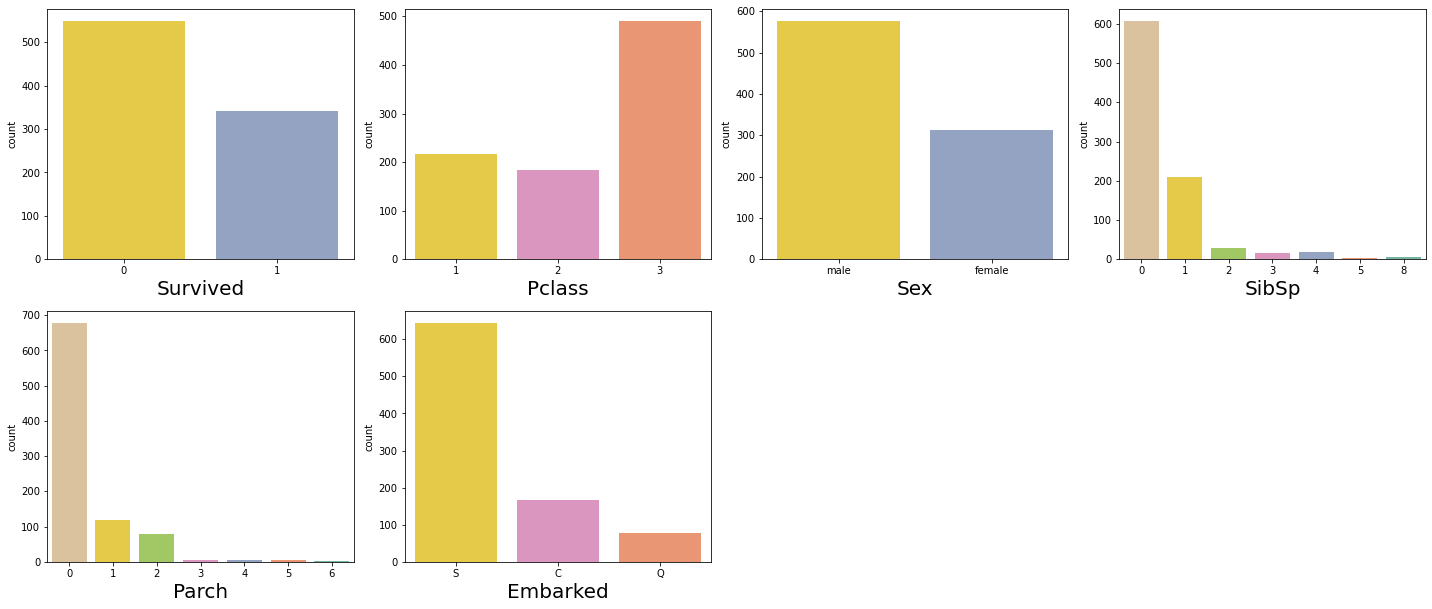

In [16]:
plt.figure(figsize=(20,50),facecolor='white')
plotnumber=1
for column in cat_col:
    if plotnumber<=20:
        ax=plt.subplot(12,4,plotnumber)
        sns.countplot(cat_col[column],palette = 'Set2_r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

1. The highest number of passengers did not survive the disaster, indicating a significant loss of life.

2. The majority of passengers were in the 3rd class, suggesting a larger number of passengers from lower socioeconomic backgrounds.

3. There were more male passengers compared to females, indicating a gender imbalance among the passengers.

4. A significant number of passengers were traveling with their siblings and spouses, indicating the presence of families or couples on board.

5. Based on the "Parents/Child" column, it can be inferred that the majority of passengers were traveling alone, without their parents or children.

6. The port of embarkation for most passengers was Southampton, suggesting that a significant portion of the passengers boarded the ship from Southampton.

In [17]:
# find out the number of children in the ship using Age and Sex
children_count = df[(df['Age'] < 18) & (df['Sex'] == 'male') | (df['Sex'] == 'female')].shape[0]
print("Number of children traveling: ", children_count)

Number of children traveling:  372


In [18]:
# make a new columns including the children
df['Passenger_Type'] = np.where(df['Age'] < 18, 'child', df['Sex'])

In [19]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Passenger_Type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,male
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,male
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,female
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S,female
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,male


<AxesSubplot:xlabel='Survived', ylabel='count'>

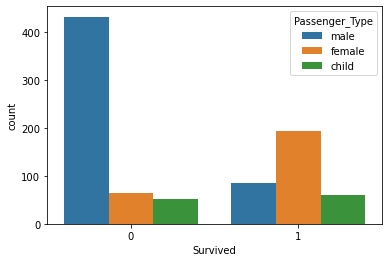

In [20]:
sns.countplot(x = "Survived",hue = "Passenger_Type",data = df)

The highest number of males lost their lives in this accident, while an equal number of children survived and did not survive. However, the highest number of females managed to survive.

<AxesSubplot:xlabel='Parch', ylabel='count'>

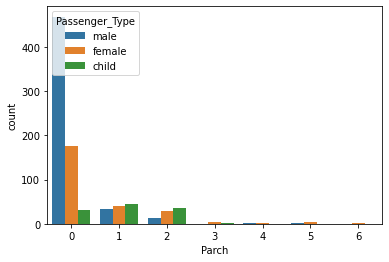

In [21]:
sns.countplot(x = "Parch",hue = "Passenger_Type",data = df)

In [22]:
df["Passenger_Type"].value_counts()

male      519
female    259
child     113
Name: Passenger_Type, dtype: int64

In [23]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.066409,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.244532,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The above statistical analysed columns include target and categorical column (Survived,Pclass,SibSp and Parch) 
1. There is no missing value.
2. Age and Fare columns are right skewed because mean is greater than median.
3. Outlier also presented in three columns because there is difference bitween maximum and 75th quartile

In [24]:
df_conti = df[["PassengerId","Age","Fare"]]

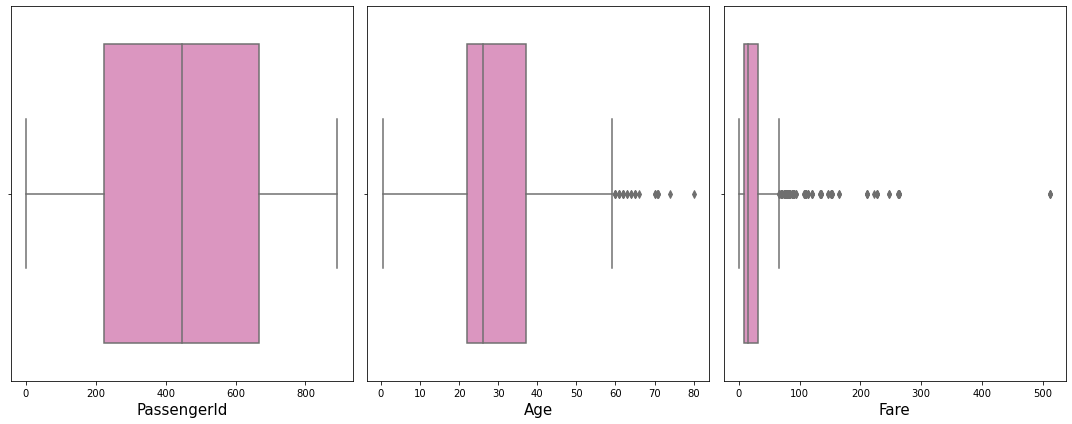

In [28]:
#Let's see the how data is distributed 
plt.figure(figsize=(15,6),facecolor='white')
plotnumber=1
for column in df_conti:
    if plotnumber<=20:
        ax=plt.subplot(1,3,plotnumber)
        sns.boxplot(df_conti[column],palette = 'Set2_r')
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

Here we can clearly seen the outliers in Age and Fare columns

# converting catogorical features

In [30]:
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i]=pd.get_dummies(df[i],drop_first=True)


In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Passenger_Type
0,1,0,3,0,1,22.0,1,0,0,7.2500,0,0
1,2,1,1,0,0,38.0,1,0,0,71.2833,0,1
2,3,1,3,0,0,26.0,0,0,0,7.9250,0,1
3,4,1,1,0,0,35.0,1,0,0,53.1000,0,1
4,5,0,3,0,1,35.0,0,0,0,8.0500,0,0


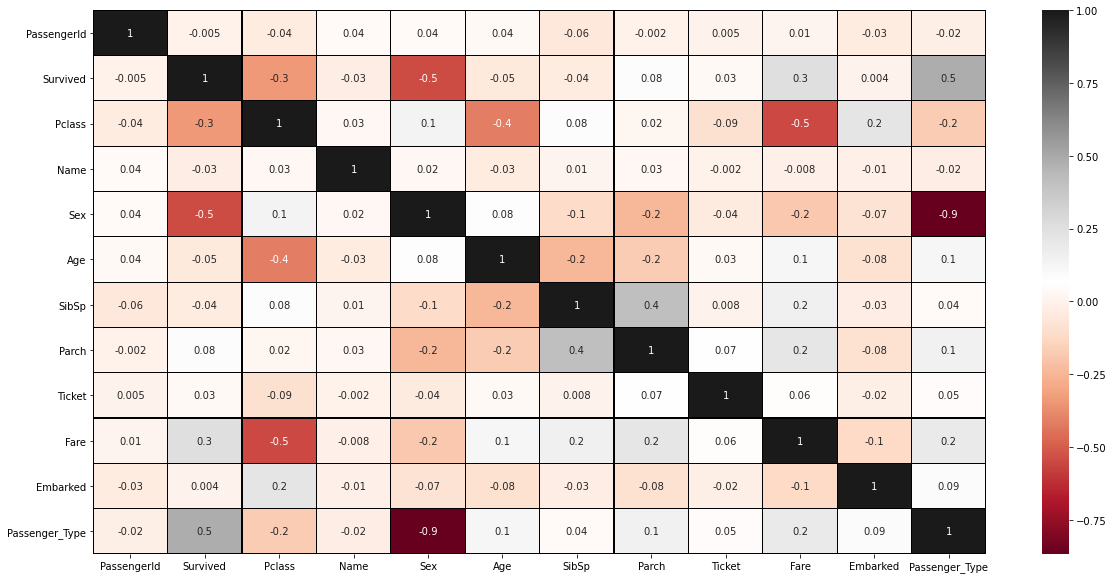

In [36]:
# visualise correlation with heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),linewidths = 0.1, fmt = '.1g', linecolor='black',annot = True, cmap = 'RdGy')
plt.yticks(rotation = 0);
plt.show()

In [37]:
df.drop(["Sex","Embarked","Name","Ticket"],axis=1,inplace=True)

drop the columns sex which we have converted into Passenger_Type and Embarked, Name and Ticket are not requered because which is not much correlated with our target.

# Outlier

In [46]:
z = np.abs((df - df.mean()) / df.std())  # Compute z-scores for each column
z

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Passenger_Type
0,1.729137,0.788829,0.826913,0.533534,0.432550,0.473408,0.502163,0.639805
1,1.725251,1.266279,1.565228,0.674512,0.432550,0.473408,0.786404,1.561223
2,1.721365,1.266279,0.826913,0.231523,0.474279,0.473408,0.488580,1.561223
3,1.717480,1.266279,1.565228,0.448003,0.432550,0.473408,0.420494,1.561223
4,1.713594,0.788829,0.826913,0.448003,0.474279,0.473408,0.486064,0.639805
...,...,...,...,...,...,...,...,...
886,1.713594,0.788829,0.369158,0.156020,0.474279,0.473408,0.386454,0.639805
887,1.717480,1.266279,1.565228,0.760043,0.474279,0.473408,0.044356,1.561223
888,1.721365,0.788829,0.826913,0.382528,0.432550,2.007806,0.176164,1.561223
889,1.725251,1.266279,1.565228,0.231523,0.474279,0.473408,0.044356,0.639805


In [81]:
threshold = 3
outlier_indices = np.where(z > threshold)  # Get indices of outlier values
print('Indices of outlier values:', outlier_indices)

Indices of outlier values: (array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 3, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4,
       6, 4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 3, 6, 4, 4, 6, 5,
       5, 3, 5, 3, 5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 3, 5, 6, 4, 4, 4, 4,
       4, 4, 3, 5, 4, 5], dtype=int64))


In [82]:
print('Shape before removing outliers:', df.shape)

df_new = df[(z <= threshold).all(axis=1)]  # Keep only rows where all columns have z-scores within the threshold

print('Shape after removing outliers:', df_new.shape)


Shape before removing outliers: (891, 8)
Shape after removing outliers: (820, 8)


In [49]:
data_loss=((891-820)/891)*100
data_loss

7.968574635241302

when we remove the outlier we have loss 7% of datas so, we removed outlier 

# Skewness

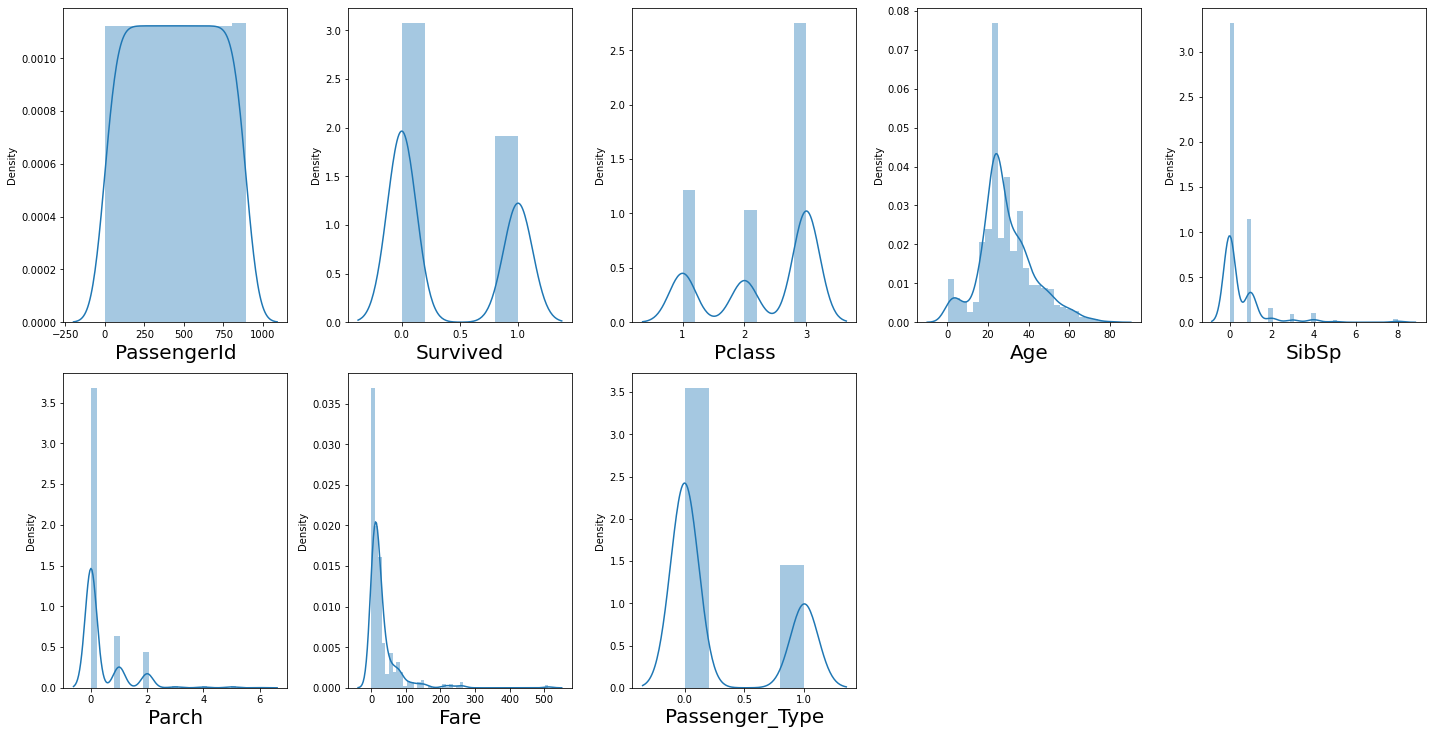

In [52]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1


for column in df:
    if plotnumber<=10:
        ax = plt.subplot(5,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
        
    plotnumber+=1
plt.tight_layout()    


In [53]:
df.skew()

PassengerId       0.000000
Survived          0.478523
Pclass           -0.630548
Age               0.548256
SibSp             3.695352
Parch             2.749117
Fare              4.787317
Passenger_Type    0.923491
dtype: float64

In the above columns we need to handle PassengerID, Age and Fare columns, from that Fare columns skewed to right side and other columns are target and categorical columns so do not handle the skewness of those columns.My threshold value is +/- 0.5

In [54]:
df["Fare"]=np.cbrt(df["Fare"]) # using cube root
df["Fare"].skew()

1.2303822111719223

In [55]:
df["Fare"]=np.sqrt(df["Fare"]) # using square root
df["Fare"].skew()

-0.9570248341402995

In [60]:
from sklearn.preprocessing import PowerTransformer

# Initializing PowerTransformer object
pt = PowerTransformer(method='yeo-johnson')
# Fitting and transforming the data
df['Fare'] = pt.fit_transform(df['Fare'].values.reshape(-1, 1))

In [61]:
df['Fare'].skew()

0.34440302084527974

Now its clear almost skewness

# split the data as input and output

In [62]:
x =df.drop(columns=["Survived"]) # features
y = df[["Survived"]] # label

In [63]:
scaler = StandardScaler()
x=scaler.fit_transform(x)

# finding best random state

In [64]:

maxAccu=0
maxRs=0
for i in range(100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    lr =LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i

print("best accuracy is",maxAccu,"on random_state",maxRs)        

best accuracy is 0.847457627118644 on random_state 4


best accuracy score is 84% when random_state is 4

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=4)

In [69]:
# function for model building
def eval(r):
    model=r
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    acc = accuracy_score(y_test,pred)
    f_score = f1_score(y_test,pred)
    scr = cross_val_score(model,x,y,cv=3)
    print("Accuracy score is:",acc)
    print("F1 score is:",f_score)
    print(confusion_matrix(y_test,pred))
    print("\n")
    print(classification_report(y_test,pred))
    print("\n")
    print("cross validation score :",scr.mean())

In [70]:
eval(LogisticRegression())

Accuracy score is: 0.847457627118644
F1 score is: 0.7668393782383419
[[176  19]
 [ 26  74]]


              precision    recall  f1-score   support

           0       0.87      0.90      0.89       195
           1       0.80      0.74      0.77       100

    accuracy                           0.85       295
   macro avg       0.83      0.82      0.83       295
weighted avg       0.85      0.85      0.85       295



cross validation score : 0.7946127946127945


In [73]:
eval(RandomForestClassifier())

Accuracy score is: 0.8406779661016949
F1 score is: 0.7513227513227513
[[177  18]
 [ 29  71]]


              precision    recall  f1-score   support

           0       0.86      0.91      0.88       195
           1       0.80      0.71      0.75       100

    accuracy                           0.84       295
   macro avg       0.83      0.81      0.82       295
weighted avg       0.84      0.84      0.84       295



cross validation score : 0.8069584736251403


In [232]:
eval(SVC())

Accuracy score is: 0.847457627118644
F1 score is: 0.7887323943661972
[[166  17]
 [ 28  84]]


              precision    recall  f1-score   support

           0       0.86      0.91      0.88       183
           1       0.83      0.75      0.79       112

    accuracy                           0.85       295
   macro avg       0.84      0.83      0.83       295
weighted avg       0.85      0.85      0.85       295



cross validation score : 0.7295781789545547


Accuracy score of above three model is above 80% and F1 score is above 70%. There is no much differents in accuracy and cross validation so there is no under fitting and over fitting.Let's try to improve the accuracy of our best model.for that we need to calculate least different in accuracy and cross validation.

Our best model is RandomForestClassifier

# GridsearchCV 

In [75]:
parameter={"max_depth":np.arange(1,10),
           "criterion":["gini","entropy"],
            "min_samples_split": [2, 5, 10],
            "n_estimators": [50, 100, 200]}

In [76]:
gcv=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [77]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [78]:
gcv.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_split': 10,
 'n_estimators': 200}

In [79]:
final_model=RandomForestClassifier(max_depth=6,criterion="entropy",min_samples_split= 10 ,n_estimators = 200)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
f_score=f1_score(y_test,pred)
confusion=confusion_matrix(y_test,pred)
print(acc)
print(f_score)
print(confusion)

0.8305084745762712
0.715909090909091
[[182  13]
 [ 37  63]]


now the accuracy of model increase from 80 to 83

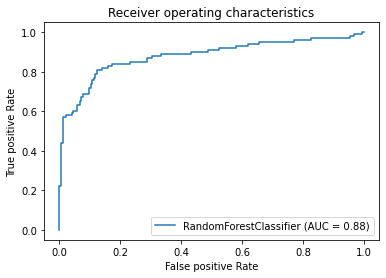

In [80]:

plot_roc_curve(final_model,x_test,y_test)
plt.title("Receiver operating characteristics")
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.show()

AUC  is 88%